In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(img, time):
    cv2.imshow("frame: ", img)
    cv2.waitKey(time)
    cv2.destroyAllWindows()

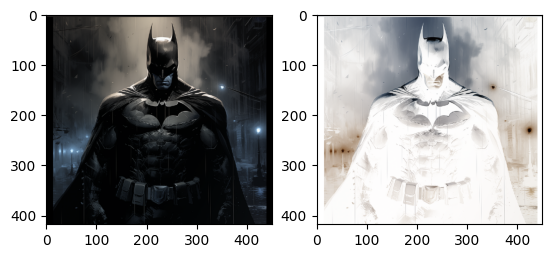

In [43]:
orig_img = cv2.imread('./images/batman.png')
img = 255-orig_img

fig, axs = plt.subplots(1,2)

axs[0].imshow(orig_img)
axs[1].imshow(img)

plt.show()

In [59]:
log_trnsf = orig_img.astype(np.float32)

# Calculate scaling constant 'c'
c = 255 / (1 + np.log(1 + np.max(log_trnsf)))

# Apply log transform
log_trnsf = c * np.log(1 + log_trnsf)

# Clip values to [0, 255] and convert back to uint8
log_trnsf = np.clip(log_trnsf, 0, 255).astype(np.uint8)

# Display the transformed image
show(log_trnsf, 5000)

In [58]:
import cv2
import numpy as np

# Load the original image
orig_img = cv2.imread('./images/batman.png')

# Create a copy of the image
img = orig_img.copy()

# Create an initial concatenated image to display
r = np.concatenate([img, img], axis=1)

# Create a named window to hold the trackbar
cv2.namedWindow('win')
cv2.imshow('win', r)

# Callback function for the trackbar
def onchange(value):
    gamma = max(value / 100, 0.01)  # Ensure gamma is never zero to avoid power issues
    c = 1  # Scaling constant
    tf = c * (np.power(img.astype(np.float32) / 255.0, gamma)) * 255.0  # Normalize, apply gamma, and scale back
    tf = tf.astype(img.dtype)  # Convert back to original image dtype
    r = np.concatenate([img, tf], axis=1)  # Concatenate original and transformed images
    cv2.imshow('win', r)  # Display updated image

# Create a trackbar in the 'win' window
cv2.createTrackbar('slider', 'win', 0, 100, onchange)

# Wait indefinitely until a key is pressed
cv2.waitKey(0)
cv2.destroyAllWindows()


In [46]:
#histogram equalisation 

img = orig_img.copy()
img = cv2.resize( img,(500,600))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(img, 1000)

y1, x1 = 30, 50
y2, x2 = 200,250

slope0 = y1/x1
intercept0 = y1 - slope0*x1

slope1 = (y2-y1)/(x2-x1)
intercept1 = y1 - slope1*x1

slope2 = 255-y2/255-x2
intercept2 = y2 - slope2*x2

print(img.shape)
h, w = img.shape[0], img.shape[1]

output = np.zeros_like(img)

for i in range(h):
    for j in range(w):
        if img[i][j] < x1:
            output[i][j] = slope0*img[i][j] + intercept0
        elif x1 < img[i][j] < x2:
            output[i][j] = slope1*img[i][j] + intercept1
        else:
            output[i][j] = slope2*img[i][j] + intercept2

show(output, 3000)
            


(600, 500)


KeyboardInterrupt: 

In [25]:
#intensity level slicing
img = orig_img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
h, w = img.shape[0], img.shape[1]

output = img.copy()

l = 100
r =150

for i in range(h):
    for j in range(w):
        if img[i][j] > l and img[i][j]<h:
            output[i][j] +=50
r = np.concatenate([img, output], axis=1)
show(r, 5000)

In [62]:
#improved gray level slicing

img = orig_img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

l = 80
u = 120

high = cv2.inRange(img, l, u)

high2 = img.copy()
high2[(img>l) & (img<h)] = 255

r = np.concatenate([img, high, high2], axis = 1)
show(r, 5000)

In [61]:
#bright spot detection
img = cv2.imread('./images/lights.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(np.max(img))
#get points of max intensity (with error)
maxI = np.where(img == np.max(img))
# print(maxI[0], maxI[1])
print(maxI)

#make binary mask (removing outliers (noise))
binary_mask = np.zeros_like(img)
binary_mask[maxI] = 255
show(binary_mask, 1000)

#erode and dilate 
eroded = cv2.erode(binary_mask, np.ones((3,3), np.uint8), iterations = 1)
dilated = cv2.dilate(eroded, np.ones((5,5), np.uint8), iterations = 1)
# show(dilated, 2000)

#final indices (without error)
maxI = np.where(dilated == 255)
print(maxI)

#check if any bright spots and plot
if len(maxI[0]) > 0 and len(maxI[1]) >0 :
    c_x = int(np.mean(maxI[0]))
    c_y = int(np.mean(maxI[1]))

    radius = 50

        cv2.circle(img, (c_x, c_y), radius, (0,255,0), 2  )

show(img, 3000)

IndentationError: unexpected indent (2643415809.py, line 31)